# Persones i número de cotxes

Disposem d'un fitxer ' dades_personas.csv' amb informació sobre el salari de persones i la quantitat de cotxes. Com podrem intuir, hi ha molta diferència entre l'ordre de magnitud d'una i altra variable, pel que resulta necessari escalar, normalitzar i estandarditzar les dades, per a la qual cosa farem ús de la classe `preprocessing` d'*sklearn*.

In [3]:
# Primer pas. Carregar el fitxer de dades

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Disposem del fitxer de dades en aquest amateixa carpeta
dades=pd.read_csv("./datos_personas.csv", encoding='ISO-8859-1')

print(dades.shape)
dades

(1000, 2)


,ingreso,coches
0,22273.577534,3
1,8961.047249,1
2,7437.977263,2
3,12064.915290,2
4,9296.396167,1
...,...,...
995,9998.522402,0
996,6867.097603,2
997,9757.539280,1
998,11044.031510,1


Com veiem, és una matriu de 1000 files per dues columnes, i podem apreciar també el diferent ordre de magnitud entre una i altra columna.

Anem a representar gràficament aquest conjunt de dades, per veure-ho més clarament.

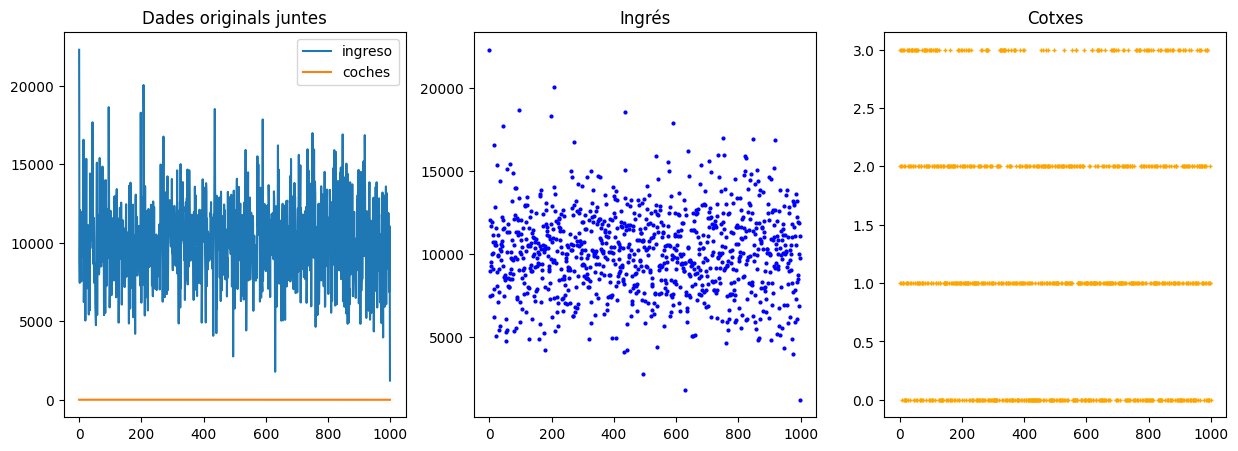

In [45]:
# Mostrem un gràfic de tres subfigures, de grandària 15x5

fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 3, 1) # subfigura 1: fila 1 de 3 columnes; ubicació 1
ax2 = fig.add_subplot(1, 3, 2) # subfigura 2: fila 1 de 3 columnes; ubicació 2
ax3 = fig.add_subplot(1, 3, 3) # subfigura 3: fila 1 de 3 columnes; ubicació 3

# Subfigura 1: Representem tot el conjunt de dades

ax1.set_title("Dades originals juntes") # Títol
ax1.plot(dades, label=dades.columns)    # Dades
ax1.legend(loc='upper right')           # Ubicació de la llegenda

# Subfigura 2: Distribució dels ingresos
ax2.set_title("Ingrés")

# Fem un núvol de punts
# format: Sense línia, amb un marcador 'o', de color blau, i de grandària 2
ax2.plot(dades["ingreso"], linewidth=0, marker="o", color="blue", markersize=2) 

# Subfigura 3: Distribució del número de cotxes
ax3.set_title("Cotxes")
# Núvol de punts
# format: sense línia, amb un marcadir '+', de color taronja i grandària 3
ax3.plot(dades["coches"], linewidth=0, marker="+", color="orange", markersize=3)
plt.show()

Com podem comprovar, la gràfica reflexa la disparitat de l'ordre de magnitud entre unes i altres dades. Com veiem al primer gràfic, no s'aprecia la variabilitat en els cotxes, ja que va de 0 a 3, mentr que les representacions dels ingresos arriben fins a valors de més de 20.000.

En canvi, si representem les columnes per separat, veiem com, dins de les diferents magnituds, sí que s'aprecien canvis.

Anem a veure ara la distribució d'aquestes dades mitjançant els respectius histogrames.

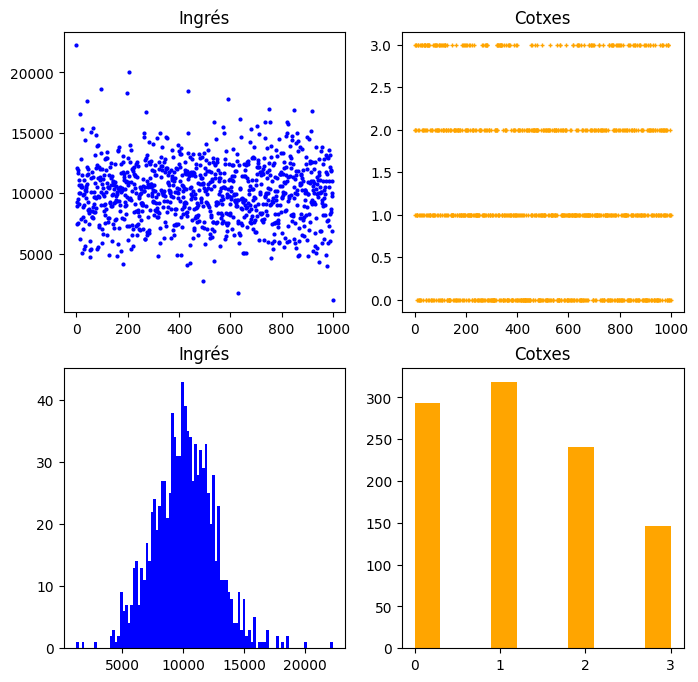

In [46]:
# Representació dels histogrames

# Grandària de la figura: 8x8
fig = plt.figure(figsize=(8, 8))

# Anem a representar 4 subgràfics, en una
# matriu de 2x2:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# Mostrem els gràfics de cada variable
ax1.set_title("Ingrés")
ax1.plot(dades["ingreso"], linewidth=0, marker="o", color="blue", markersize=2)
ax2.set_title("Cotxes")
ax2.plot(dades["coches"], linewidth=0, marker="+", color="orange", markersize=3)

# I ara els histogrames per a cadascuna
ax3.set_title("Ingrés")
ax3.hist(dades["ingreso"], bins=100, color="blue")
ax4.set_title("Cotxes")
ax4.hist(dades["coches"], color="orange")
plt.show()

Com veiem, ambdues columnes segueixen una distribució normal, però convé homogeneïtzar de maner aque cadascuna tinga el mateix pes durant l'aprenentatge automàtic. Anem a fer ús dels diferents mètodes d'escalat *MinMaxScaler* i *StandardScaler*, i introduirem l'escalat *RobustScaler* que utilitza el rang interquartílic.

## Escalat amb MinMaxScaler

In [65]:
dades_min_max = preprocessing.MinMaxScaler().fit_transform(dades)

# Podem veure que les dades es troben entre 0 i 1. La primera columna conté les dades 
# normalitzades dels ingresos (0 el menor i 1 el major), i la segona columna conté les 
# dades normalitzades del número de cotxes (1 el qui més i 0 el qui menys). Veiem que
# aquesta segona columna té només quatre valors diferents (1, 0.6, 0.3 i 0).
dades_min_max

array([[1.        , 1.        ],
       [0.36761553, 0.33333333],
       [0.29526521, 0.66666667],
       ...,
       [0.40545125, 0.33333333],
       [0.46656343, 0.33333333],
       [0.        , 0.        ]])

Veiem gràficament com esveuria això, representant tant les dades com l'histograma, i observeu com ara, si que serien comparables.

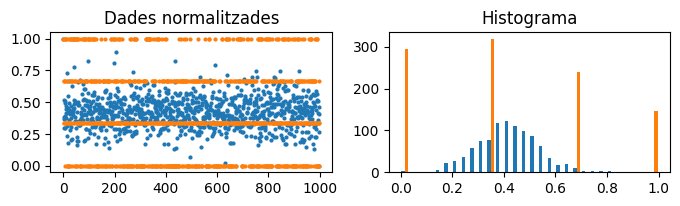

In [67]:
# Grandària de la figura: 8x4
fig = plt.figure(figsize=(8, 4))

# Anem a representar 4 subgràfics, en una
# matriu de 2x2:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

# Mostrem els gràfics de cada variable
ax1.set_title("Dades normalitzades")
ax1.plot(dades_min_max, linewidth=0, marker="o", markersize=2)

# I ara els histogrames per a cadascuna
ax2.set_title("Histograma")
ax2.hist(dades_min_max, bins=30)
ax4.set_title("Cotxes")
#ax4.hist(dades["coches"], color="orange")
#plt.show()

plt.show()

## Escalat StandardScaler

In [48]:
dades_std_scaler = preprocessing.StandardScaler().fit_transform(dades)

# Veiem ara com les dades es troben al voltant d'una mitja de 0 i una desviació estàndard d'1,
# pel que les dades estan més distribuides.
dades_std_scaler

array([[ 4.81555174,  1.70892042],
       [-0.4413019 , -0.23193185],
       [-1.04273197,  0.73849429],
       ...,
       [-0.12678303, -0.23193185],
       [ 0.38122719, -0.23193185],
       [-3.49719763, -1.20235798]])

Veiem-ho també gràficament:

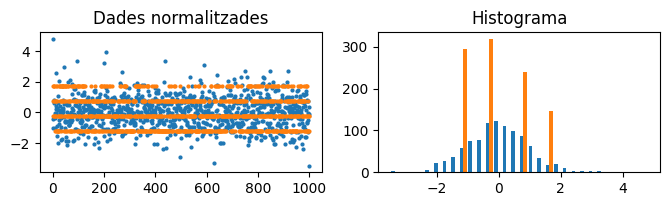

In [68]:
# Grandària de la figura: 8x4
fig = plt.figure(figsize=(8, 4))

# Anem a representar 4 subgràfics, en una
# matriu de 2x2:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

# Mostrem els gràfics de cada variable
ax1.set_title("Dades normalitzades")
ax1.plot(dades_std_scaler, linewidth=0, marker="o", markersize=2)

# I ara els histogrames per a cadascuna
ax2.set_title("Histograma")
ax2.hist(dades_std_scaler, bins=30)
ax4.set_title("Cotxes")
#ax4.hist(dades["coches"], color="orange")
#plt.show()

plt.show()

## RobustScaler

El mètode *RobustScaler* fa ús del rang interquartílic, que treballa en un interval [Q3-Q1], pel que proporciona unes dades menys distribuïdes.

In [69]:
dades_robust_scaler = preprocessing.RobustScaler().fit_transform(dades)
dades_robust_scaler

array([[ 3.70548334,  1.        ],
       [-0.3376601 ,  0.        ],
       [-0.80023109,  0.5       ],
       ...,
       [-0.09575781,  0.        ],
       [ 0.29496225,  0.        ],
       [-2.68800607, -0.5       ]])

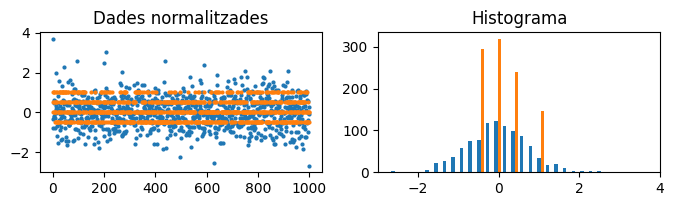

In [70]:
# Grandària de la figura: 8x4
fig = plt.figure(figsize=(8, 4))

# Anem a representar 4 subgràfics, en una
# matriu de 2x2:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

# Mostrem els gràfics de cada variable
ax1.set_title("Dades normalitzades")
ax1.plot(dades_robust_scaler, linewidth=0, marker="o", markersize=2)

# I ara els histogrames per a cadascuna
ax2.set_title("Histograma")
ax2.hist(dades_robust_scaler, bins=30)
ax4.set_title("Cotxes")
#ax4.hist(dades["coches"], color="orange")
#plt.show()

plt.show()

El principal avantatge de RobustScaler és que, com que fa ús del rang interquartílic, ignora els valors que hi ha pels extrems, eliminant així dades que poden portar a confussió o provocar un mal entrenament (*outliers*)

# Comparació dels mètodes

Anem a veure gràficament el resultat de la normalització en els diferents mètodes. Per a això, per a cada conjunt de dades anem a crear un DataFrame per dibuixar-los més fàcilment.

In [86]:
dades

,ingreso,coches
0,22273.577534,3
1,8961.047249,1
2,7437.977263,2
3,12064.915290,2
4,9296.396167,1
...,...,...
995,9998.522402,0
996,6867.097603,2
997,9757.539280,1
998,11044.031510,1


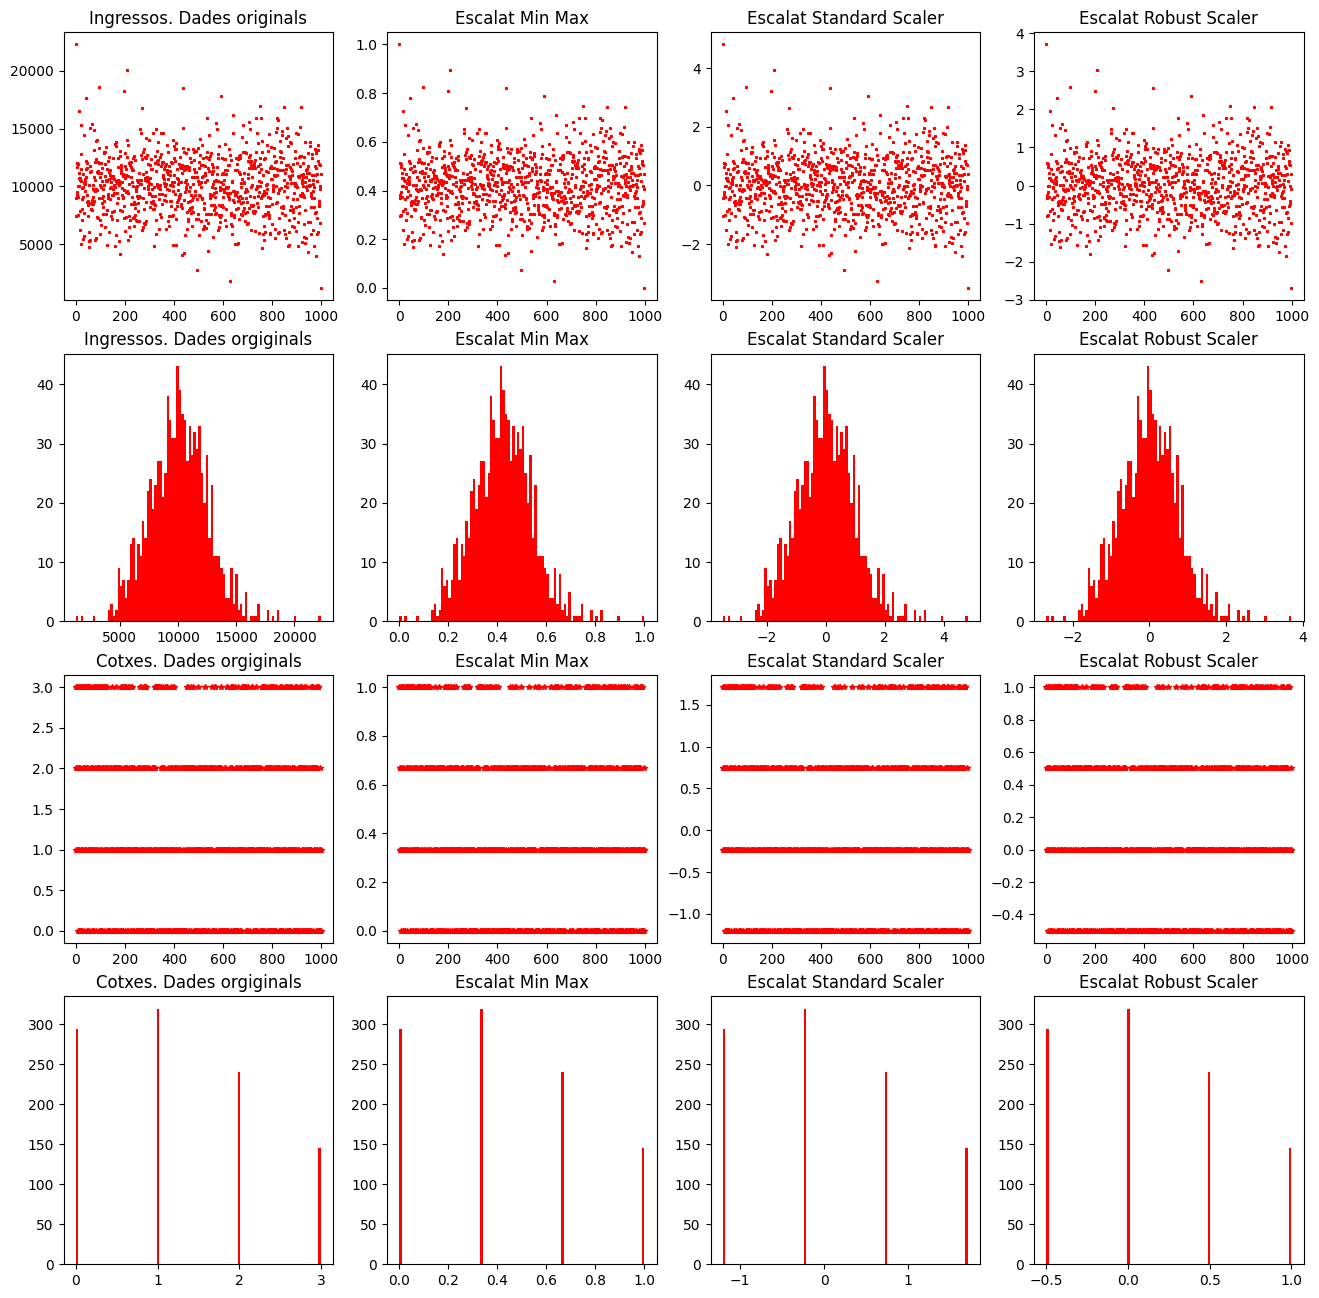

In [90]:
df_dades = dades.rename(columns={'ingreso': 'Ingressos', 'coches': 'Cotxes'})
df_dades_min_max = pd.DataFrame(dades_min_max, columns=["Ingressos", "Cotxes"])
df_dades_std_scaler = pd.DataFrame(dades_std_scaler, columns=["Ingressos", "Cotxes"])
df_dades_robust_scaler = pd.DataFrame( dades_robust_scaler, columns=["Ingressos", "Cotxes"])


fig = plt.figure(figsize=(16, 16))

ax1 = fig.add_subplot(4, 4, 1)
ax2 = fig.add_subplot(4, 4, 2)
ax3 = fig.add_subplot(4, 4, 3)
ax4 = fig.add_subplot(4, 4, 4)
ax5 = fig.add_subplot(4, 4, 5)
ax6 = fig.add_subplot(4, 4, 6)
ax7 = fig.add_subplot(4, 4, 7)
ax8 = fig.add_subplot(4, 4, 8)
ax9 = fig.add_subplot(4, 4, 9)
ax10 = fig.add_subplot(4, 4, 10)
ax11 = fig.add_subplot(4, 4, 11)
ax12 = fig.add_subplot(4, 4, 12)
ax13 = fig.add_subplot(4, 4, 13)
ax14 = fig.add_subplot(4, 4, 14)
ax15 = fig.add_subplot(4, 4, 15)
ax16 = fig.add_subplot(4, 4, 16)

# Ingressos. Visualització de dades en les diferents escales

ax1.set_title("Ingressos. Dades originals")
ax1.plot(df_dades["Ingressos"], linewidth=0, marker="*", color="red", markersize=2)

ax2.set_title("Escalat Min Max")
ax2.plot( df_dades_min_max["Ingressos"], linewidth=0, marker="*", color="red", markersize=2)

ax3.set_title("Escalat Standard Scaler")
ax3.plot(df_dades_std_scaler["Ingressos"], linewidth=0, marker="*", color="red", markersize=2)

ax4.set_title("Escalat Robust Scaler")
ax4.plot(df_dades_robust_scaler["Ingressos"], linewidth=0, marker="*", color="red", markersize=2)

# Histogrames

ax5.set_title("Ingressos. Dades orgiginals")
ax5.hist( df_dades["Ingressos"], color="red", bins=100)

ax6.set_title("Escalat Min Max")
ax6.hist(df_dades_min_max["Ingressos"], color="red", bins=100)

ax7.set_title("Escalat Standard Scaler")
ax7.hist(df_dades_std_scaler["Ingressos"], color="red", bins=100)

ax8.set_title("Escalat Robust Scaler")
ax8.hist(df_dades_robust_scaler["Ingressos"], color="red", bins=100)


# Cotxes. Visualització de les dades en diferents escales

ax9.set_title("Cotxes. Dades orgiginals")
ax9.plot(df_dades["Cotxes"], linewidth=0, marker="*", color="red", markersize=4)

ax10.set_title("Escalat Min Max")
ax10.plot(df_dades_min_max["Cotxes"], linewidth=0, marker="*", color="red", markersize=4)

ax11.set_title("Escalat Standard Scaler")
ax11.plot(df_dades_std_scaler["Cotxes"], linewidth=0, marker="*", color="red", markersize=4)

ax12.set_title("Escalat Robust Scaler")
ax12.plot(df_dades_robust_scaler["Cotxes"], linewidth=0, marker="*", color="red", markersize=4)

ax13.set_title("Cotxes. Dades orgiginals")
ax13.hist(df_dades["Cotxes"], color="red", bins=100)

ax14.set_title("Escalat Min Max")
ax14.hist(df_dades_min_max["Cotxes"], color="red", bins=100)

ax15.set_title("Escalat Standard Scaler")
ax15.hist(df_dades_std_scaler["Cotxes"], color="red", bins=100)

ax16.set_title("Escalat Robust Scaler")
ax16.hist(df_dades_robust_scaler["Cotxes"], color="red", bins=100)

plt.show()

Tal i com podem comprovar, les gràfiques són les mateixes, i el que canvia és l'escala en totes elles.